# Approch

1. if Normal Distribute
    1. Data = mean + 3*std
    2. Data = mean - 3*std
2. if skewed
    1. Q1-1.5*IQR
    2. Q3+1.5*IQR

# import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [3]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


# See distribution

<Axes: ylabel='Density'>

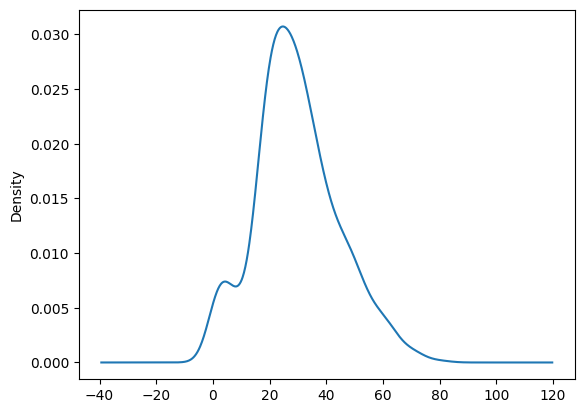

In [6]:
df['Age'].plot(kind='kde')

<Axes: ylabel='Density'>

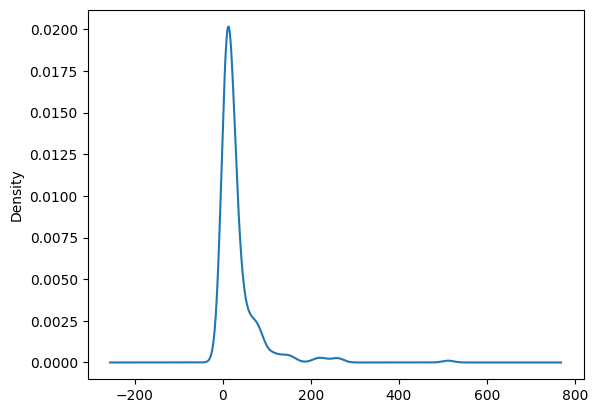

In [8]:
df['Fare'].plot(kind='kde')

# Apply Normal Distribution on `Age` Column

In [9]:
std = df['Age'].std()
mean = df['Age'].mean()

In [25]:
u = lambda x: mean+3*std if x>mean+3*std else (mean-3*std if x<mean-3*std else x)

In [41]:
df['age_new'] = df['Age'].fillna(mean-(3*std))

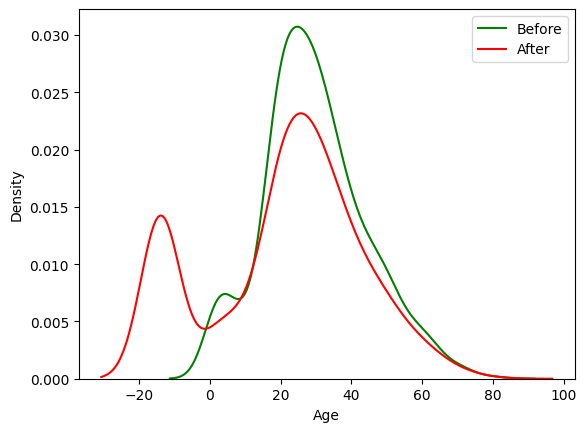

In [42]:
sns.kdeplot(df['Age'], color='green', label='Before')
sns.kdeplot(df['age_new'], color='red', label='After')

plt.legend()
plt.show()

## Variance check

In [43]:
print("Age Variance: ", df['Age'].var())
print("New Age Variance: ", df['age_new'].var())

Age Variance:  211.0191247463081
New Age Variance:  471.7215061361525


# Apply Skewed data on `Fare` Column

In [44]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3-Q1

In [47]:
df['fare_new'] = df['Fare'].fillna(Q1+(1.5*IQR))

In [48]:
df.sample(5)

,Age,Fare,Family,Survived,age_new,fare_new
516,34.0,10.50,0,1,34.0,10.500000
694,60.0,26.55,0,0,60.0,26.550000
618,4.0,39.00,3,1,4.0,39.000000
435,14.0,120.00,3,1,14.0,120.000000
271,25.0,NaN,0,1,25.0,42.861475


In [49]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000
age_new,0.000000
fare_new,0.000000


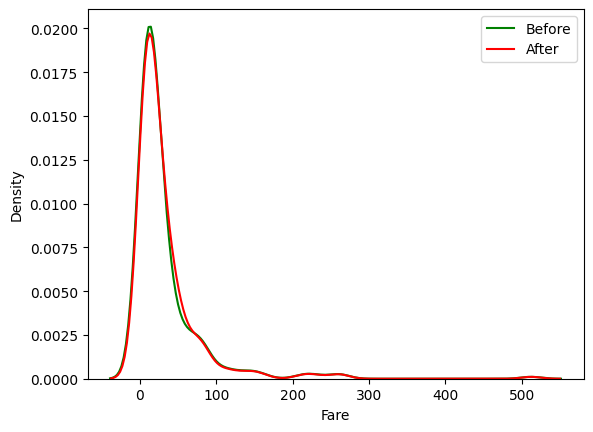

In [50]:
sns.kdeplot(df['Fare'], color='green', label='Before')
sns.kdeplot(df['fare_new'], color='red', label='After')

plt.legend()
plt.show()